# Filtros FIR Pasa Banda

In [5]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [6]:
def firdesign(N, fc, sr, ftype='low',info=False):
    ft = fc/float(sr)
    M  = int( N+1 )
    tk = np.arange(M) - M/2
    
    tk[M/2] = -1
    
    if 'low' in ftype:
        sinc      = np.sin(2*np.pi*ft*tk)/(np.pi*tk)
        sinc[M/2] = 2*ft
        tk[M/2]   = 0
    
    elif 'high' in ftype:
        sinc      = -np.sin(2*np.pi*ft*tk)/(np.pi*tk)
        sinc[M/2] = 1-2*ft
        tk[M/2]   = 0
    
    else:
        print 'No se especifico tipo de filtro'
        sinc = np.zeros(tk.shape[0])
        
    if info:
        print tk,M
        plt.plot(ft*tk,sinc,'-o',markersize=9,linewidth=3)
        plt.grid(True)
        
        plt.show()
    return sinc

In [10]:
def freq_hz(S,sr):
    w, h = signal.freqz(S)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

In [7]:
N   = 41
M   = N+1
fcl = 45
fch = 80
sr  = 300

cl_fir = firdesign(N,fcl,sr)
ch_fir = firdesign(N,fch,sr, ftype='high')
cb_fir = cl_fir + ch_fir

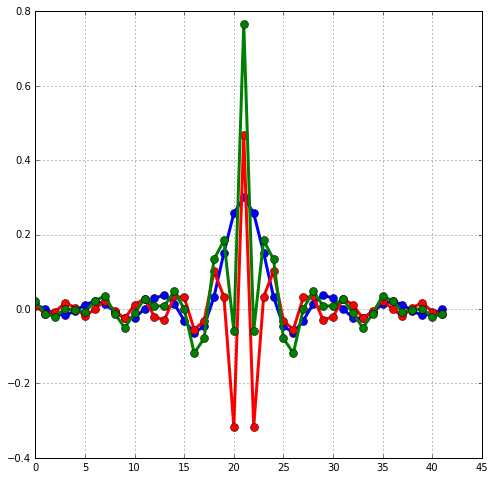

In [9]:
plt.figure(figsize=(8,8))
plt.plot(cl_fir,'-bo',markersize=8,linewidth=3)
plt.plot(ch_fir,'-ro',markersize=8,linewidth=3)
plt.plot(cb_fir,'-go',markersize=8,linewidth=3)
plt.grid(True)
plt.show()

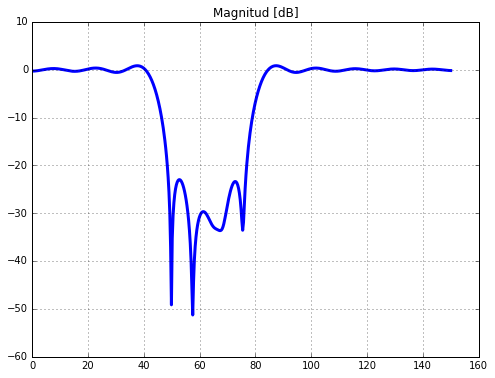

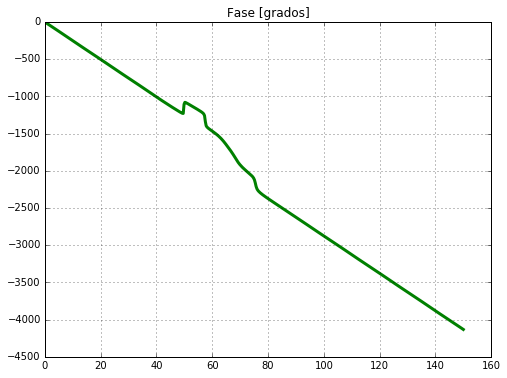

In [11]:
w,W,H = freq_hz(cb_fir,sr)


plt.figure( figsize=(8,6) )
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot( w,H,'b',linewidth=3 )

plt.figure( figsize=(8,6) )
plt.title('Fase [grados]')
plt.plot( w,W,'g',linewidth=3 )
plt.grid(True)
plt.show()



Ventanas

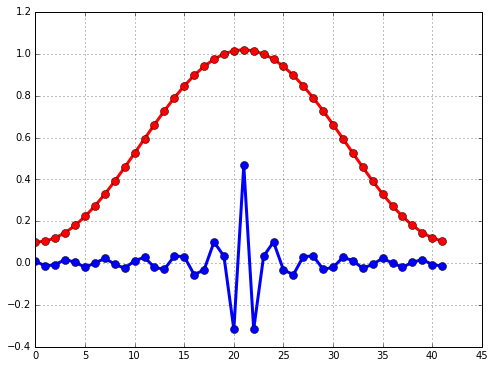

In [12]:
tk   = np.arange(N+1)
hamm = .56 - .46*np.cos( 2*np.pi*tk/float(M) )

plt.figure(figsize=(8,6))
plt.plot(ch_fir,'-bo',linewidth=3,markersize=8)
plt.plot(hamm  ,'-ro',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


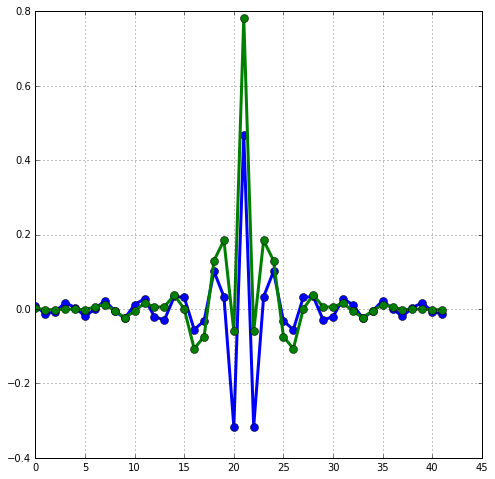

In [13]:
W_fir = cb_fir*hamm

plt.figure(figsize=(8,8))
plt.plot(ch_fir,'-bo',linewidth=3,markersize=8)
plt.plot(W_fir ,'-go',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


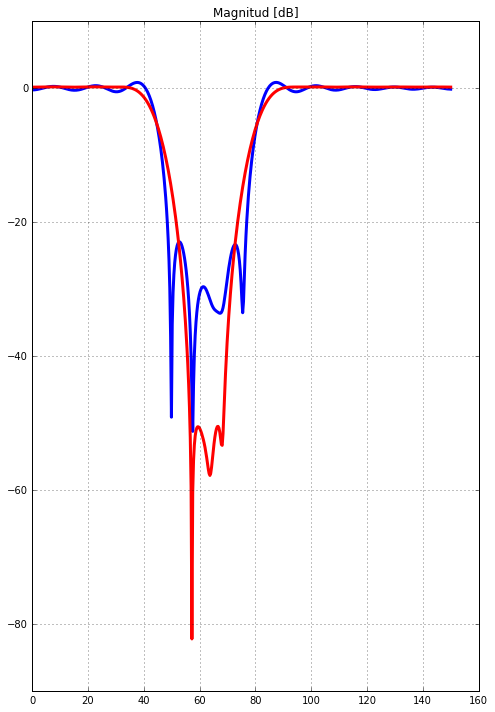

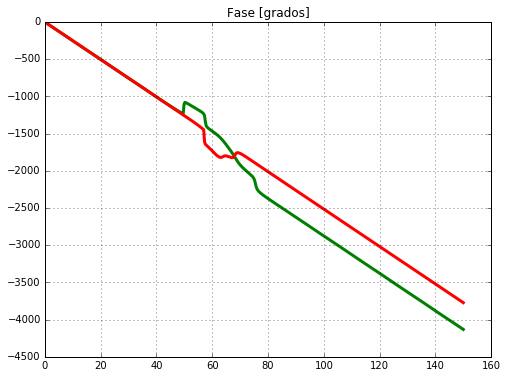

In [16]:
w ,w_hz ,h_hz  = freq_hz(cb_fir,sr)
wW,w_hzW,h_hzW = freq_hz( W_fir,sr)


plt.figure( figsize=(8,12) )
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot( w ,h_hz ,'b',linewidth=3 )
plt.plot( wW,h_hzW,'r',linewidth=3 )

plt.figure( figsize=(8,6) )
plt.title('Fase [grados]')
plt.plot( w ,w_hz ,'g',linewidth=3 )
plt.plot( wW,w_hzW,'r',linewidth=3 )
plt.grid(True)
plt.show()

